# Proposta de avaliação da disciplina Python
## Latu Sensu IoT - Internet of Things
### Centro Universitário Nove de Julho - UNINOVE

Alunos
* Tiago Normando    RA: 621203825
* Vitor Nunciatelli RA: 621203933

### A proposta é entregar um notebook contendo os seguintes tarefas:

1. Leitura de dados com pandas
2. Manipulação e limpeza de dados com pandas
3. Descritivo e exploração de dados com pandas (groupbys)
4. Figuras que mostrem insights sobre os dados com pandas e matplotlib
5. Quebrar os dados em conjunto de treino e conjunto de teste
6. Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino
7. Verificar o desempenho do estimador do scikit-learn no conjunto de teste

### 1. Leitura de dados com pandas
Escolhemos um dataset no kaggle.com sobre aplicativos no Google Play

In [352]:
# biblioteca para criação de dataFrames
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sklearn

dados = pd.read_csv(r'gps.csv', index_col=0)
dados.head(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up


### 2. Manipulação e limpeza de dados com pandas

In [353]:
#Inspecionando o dataframe
type(dados)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [354]:
dados.shape

(10841, 12)

In [355]:
dados.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [356]:
dados.tail(10)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Removendo colunas que não serão utilizadas

In [357]:
dados.drop(['Android Ver'], axis=1, inplace=True)  # True ele altera o DF
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1


In [358]:
dados.drop(['Current Ver'], axis=1, inplace=True)  # True ele altera o DF
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [359]:
dados.drop(['Last Updated'], axis=1, inplace=True)  # True ele altera o DF
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [360]:
dados.drop(['Genres'], axis=1, inplace=True)  # True ele altera o DF
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
App,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [361]:
dados.drop(['Content Rating'], axis=1, inplace=True)  # True ele altera o DF
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


In [362]:
dados.dropna(axis=0).head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


#### Removendo dados nulos

In [363]:
dados.isnull()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,False,False,False,False,False,False,False
Coloring book moana,False,False,False,False,False,False,False
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",False,False,False,False,False,False,False
Sketch - Draw & Paint,False,False,False,False,False,False,False
Pixel Draw - Number Art Coloring Book,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
Sya9a Maroc - FR,False,False,False,False,False,False,False
Fr. Mike Schmitz Audio Teachings,False,False,False,False,False,False,False
Parkinson Exercices FR,False,True,False,False,False,False,False


In [364]:
dados[['Category']]

,Category
App,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
Coloring book moana,ART_AND_DESIGN
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN
Sketch - Draw & Paint,ART_AND_DESIGN
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN
...,...
Sya9a Maroc - FR,FAMILY
Fr. Mike Schmitz Audio Teachings,FAMILY
Parkinson Exercices FR,MEDICAL


#### Limpeza de dos dados

In [365]:
dados=dados.replace('\+','',regex=True).astype(str)
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0


In [366]:
dados=dados.replace('\$','',regex=True).astype(str)
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",Free,0


In [367]:
dados['Installs'].replace(',','', regex=True, inplace=True)
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0


In [368]:
dados['Installs'].replace('Free','0',inplace=True)
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0


In [369]:
dados['Price'].replace('Everyone','0',inplace=True)
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0


In [370]:
dados['Installs'] = pd.to_numeric(dados['Installs']) 
dados.head()

,Category,Rating,Reviews,Size,Installs,Type,Price
App,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0


### 3. Descritivo e exploração de dados com pandas usando Group by

In [382]:
# Agrupando dados para mostrar o total por Categoria.
dadosAux = pd.read_csv(r'gps.csv', index_col=0)

dsGrupo = dadosAux['Genres'].groupby(dadosAux['Genres']).size().reset_index(name='total')

dsGrupo.head(10)

,Genres,total
0,Action,365
1,Action;Action & Adventure,17
2,Adventure,75
3,Adventure;Action & Adventure,13
4,Adventure;Brain Games,1
5,Adventure;Education,2
6,Arcade,220
7,Arcade;Action & Adventure,16
8,Arcade;Pretend Play,1
9,Art & Design,58


In [383]:
# Agrupando as categoria pela primeira letra da descricao
dsGrupoLetra = dsGrupo['Genres'].groupby(dsGrupo['Genres'].str[0]).count().reset_index(name='total')

dsGrupoLetra.head(50)

,Genres,total
0,A,14
1,B,9
2,C,15
3,D,1
4,E,21
5,F,3
6,H,4
7,L,4
8,M,5
9,N,1


### 3. Figuras que mostrem insights sobre os dados com pandas e matplotlib

Text(0, 0.5, 'Categoria')

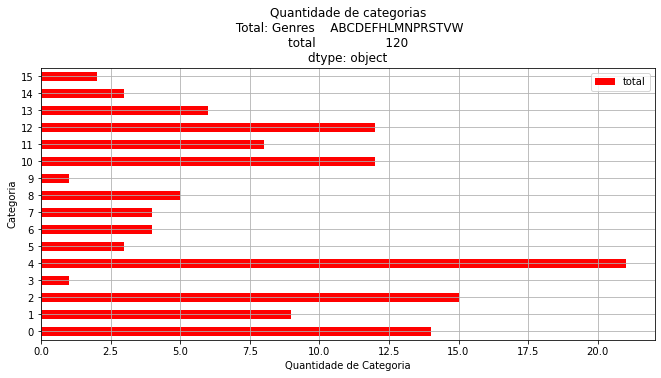

In [384]:
dsGrupoLetra.plot(kind='barh', figsize=(11,5), color='red', rot=0, grid = True)

plt.title('Quantidade de categorias\n Total: %s' %(dsGrupoLetra.sum()))
plt.xlabel('Quantidade de Categoria')
plt.ylabel('Categoria')

### 5. Quebrar os dados em conjunto de treino e conjunto de teste

In [372]:
from sklearn.model_selection import train_test_split

X = dados[['Installs']]
y = dados[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (8130, 1)
Tamanho de X_test: (2711, 1)
Tamanho de y_train: (8130, 1)
Tamanho de y_test: (2711, 1)


### 6. Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [373]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [374]:
# Regressor
y_pred = clf.predict(X_test)
sklearn.metrics.r2_score(y_test, y_pred)

-0.0003543762976299103

### 7. Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [375]:
clf.score(X_test, y_test)

-0.0003543762976299103

In [376]:
clf.coef_

array([[-1.88367903e-09]])

In [377]:
clf.intercept_

array([0.943185])

In [378]:
clf.coef_.tolist()

[[-1.8836790299044067e-09]]

In [379]:
# Coeficientes do modelo
for feature, coef in zip(dados['Installs'].tolist(), clf.coef_.tolist()):
    print(f"{feature}: {np.round(coef, 2)}")

# Constante do modelo
print(f"Constante: {np.round(clf.intercept_, 2)}")

10000: [-0.]
Constante: [0.94]


In [380]:
#ERRO DO MODELO
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = clf.predict(X_test)

print(f"MSE de Teste: {mean_squared_error(y_test, y_pred):1.1f}")
print(f"MAE de Teste: {mean_absolute_error(y_test, y_pred):1.1f}")

mse = {mean_squared_error(y_test, y_pred)}
mae = {mean_absolute_error(y_test, y_pred)}

MSE de Teste: 417.6
MAE de Teste: 2.2
